# EMB5016 - Cálculo Numérico  
## Lista de Exercícios 7 - Integração numérica

> **Questão 1**
>
> Implemente um método `Trapezio2D( f , a , b , c , d , m , n)`, que recebe:
>
> - Uma função $f=f(x,y)$ de duas variáveis.
> - Números reais $a<b$ e $c<d$.
> - Números inteiros positivos $m,n$.
>
> e retorna a aproximação da integral dupla de $f$ no quadrado $[a,b]\times [c,d]$:
> $$\int_a^b\int_c^d f(x,y)dydx$$
> utilizando uma variação do método do trapézio, conforme o seguinte procedimento:
> 1. Discretize o intervalo $[a,b]$ em $m+1$ pontos, pondo $x_i=a+i\dfrac{(b-a)}{m}$ para $i=0,1,\ldots,m$.
> 2. Similarmente, discretize o intervalo $[c,d]$ em $n+1$ pontos, pondo $y_j=a+i\dfrac{(d-c)}{n}$ para $i=0,1,\ldots,n$.
> 3. Dado um número $x$, defina $g(x)=\int_c^d f(x,y)dy$, de modo que $\int_a^b\int_c^d f(x,y)dydx=\int_a^b g(x)dx$.
> 4. Utilize a regra do trapézio com a discretização do intervalo $[a,b]$, para obter uma aproximação para $\int_a^b\int_c^d f(x,y)dydx$ em termos de $g(x_0)$, $g(x_1)$, $\ldots$, $g(x_m)$.
> 5. Para cada $i=0,1,\ldots,m$, utilize a regra do trapézio no intervalo $[c,d]$ discretizado acima para obter uma aproximação para $g(x_i)$ em termos de $f(x_i,y_0)$, $f(x_i,y_1)$, $\ldots$, $f(x_i,y_n)$.
> 6. Utilize a regra do trapézio no intervalo $[a,b]$ discretizado acima para obter uma aproximação de $\int_a^b g(x)dx$ em termosde $g(x_0)$, $g(x_1)$, $\ldots$, $g(x_m)$.

O que foi entendido pela minha pessoa:

Criar um código que calcule a integral dupla $\int_a^b\int_c^d f(x,y)dydx$

E segundo os tópicos é necessario criar uma função g(x) que calcula a integral de c a d $g(x)=\int_c^d f(x,y)dy$ e que terá x fixo e y variando em $f(x,yi)$ com i variando em $f(x,y0)$, $g(x,y1)$, $\ldots$, $f(x,yn)$.

E assim calcular a integral dupla, mas por meio de $\int_a^b g(x)dx$

In [35]:
def Trapezio2D(f,a,b,c,d,m,n):

    # Numero de subintervalos
    nInter_x = abs((b-a)/m)             
    nInter_y = abs((c-d)/n)

    #discretizando os intervalos 
    intervaloAB = [(a+i*nInter_x) for i in range(m+1)]     # ENUNCIADO 1
    IntervaloCD = [(c+j*nInter_y) for j in range(n+1)]     # ENUNCIADO 2 

    #Inicializa a Integral com 0
    integral =0.0 
    
    def g(xi):                                             #ENUNCIADO 3 
        soma = 0.0
        for y in IntervaloCD:       
           soma+= f(xi,y)                                  #ENUNCIADO 5 Aplica F(x0,yi) para i variando no Itervalo CD
        return soma*nInter_y                                

    for xi in intervaloAB:
        integral+=g(xi)                                    #ENUNCIADO 4 e 6

    return integral*nInter_x

In [31]:
def Trapeziometodo (f, a, b, c, d, m, n):
    intervalo_x = abs((b-a)/m)   
    intervalo_y = abs((c-d)/n)

    somatorio = 0.0

    for i in range (m+1):
        x = a + i*intervalo_x
        for j in range (n+1):
            y = c + j*intervalo_y
            #caso dos extremo inicial e final
            if (i==0) or (i==m): 
                somatorio+= f(x,y)/2
            else:
                somatorio+= f(x,y)
    somatorio*= intervalo_x*intervalo_y
    return somatorio

In [80]:
def f(x,y):
    return 2*x+2*y

    
print (Trapezio2D(f, 1,3, 1, 3, 1000, 1000))

print (Trapeziometodo(f, 1,3, 1, 3, 1000, 1000))


32.064032
32.032


> **Questão 2**
>
> Implemente um método `Simpson2D( f , a , b , c , d , m , n)`, que tem os mesmos parâmetros que a função da questão anterior, e também retorna uma aproximação para a integral
> $$\int_a^b\int_c^d f(x,y)dydx,$$
> porém utilizando o método de Simpson tanto na integral interna quanto na externa.

In [76]:
def Simpson2D(f,a,b,c,d,m,n):

    # Numero de subintervalos
    nInter_x = abs((b-a)/m)            
    nInter_y = abs((c-d)/n)

    #discretizando os intervalos 
    intervaloAB = [(a+i*nInter_x) for i in range(m+1)]   
    IntervaloCD = [(c+j*nInter_y) for j in range(n+1)]    

    def g(xi):                                             
        indice = 0
        Integral = 0.0
        for y in IntervaloCD:  

            if indice%2 == 0:                #Somatório com base no índice
                Integral += 2*f(xi,y)
            else:
                Integral += 4*f(xi,y)

            indice+=1

        Integral += f(xi,c)+f(xi,d)
        Integral *= nInter_y/3

        return Integral
        
    
    indice = 0
    integral= 0.0

    for xi in intervaloAB:

        if indice%2 == 0:                # Somatório com base no índice
            integral += 2*g(xi)          # 2 x Índices pares
        else:
            integral += 4*g(xi)          # 4 x Índices Ímpraes

    integral += g(a)+g(b)
    integral *= nInter_x/3
    
    return integral

In [81]:

def integral_dupla_simpson(f,a, b, c, d, nx, ny):
    hx = (b - a) / nx
    hy = (d - c) / ny

    integral = 0

    for i in range(nx + 1):
        for j in range(ny + 1):
            x = a + i * hx
            y = c + j * hy

            integral += coef_x * coef_y * f(x, y)

    integral *= (hx * hy) / 9

    return integral



Arrumar SIMPSOM2D Retorno está diferente do esperado

In [77]:
def f(x,y):
    return 2*x+2*y

    
print (Simpson2D(f, 1,3, 1, 3, 1000, 1000))

print (integral_dupla_simpson(f, 1,3, 1, 3, 1000, 1000))


21.404501333333336
32.0


> **Questão 3**
>
> Implemente um método `Gauss2D( f , a , b , c , d , m , n)`, que tem os mesmos parâmetros que a função da questão anterior, e também retorna uma aproximação para a integral
> $$\int_a^b\int_c^d f(x,y)dydx.$$
> Porém, essa função deve utilizar um método de quadratura Gaussiana com $m$ nós no cálculo da integral externa (no intervalo $[a,b]$), e um método de quadratura Gaussiana com $n$ nós no cálculo das integrais internas (no intervalo $[c,d]$). Assuma que $m,n\leq 5$.

> **Questão 4**
>
> Sejam $P_1$, $P_2$ e $P_3$ vértices de um triângulo no plano $xy$ (visto dentro do espaço tridimensional). Considere três pontos acima desse triângulo, dados em coordenadas como $Q_1=(P_1,z_1)$, $Q_2=(P_2,z_2)$ e $Q_3=(P_3,z_3)$.
>
> Encontre um modo de calcular o volume do poliedro (convexo) cujos vértices são os pontos $P_1,P_2,P_3,Q_1,Q_2,Q_3$. Implemente essa fórmula numa função `integralTriangulo( P1 , P2 , P3 , z1 , z2 , z3 )`; Cada ponto $P_i$ é dado como uma lista $P_i = [x_i,y_i]$.

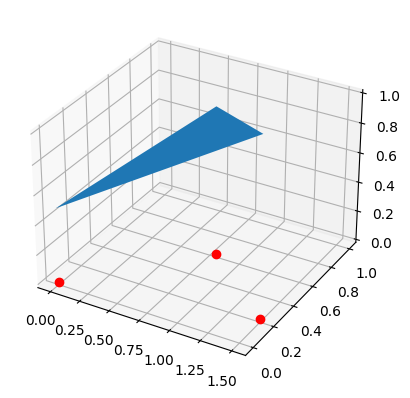

In [1]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

P =  np.array([
    [[0,0,0.5],[1.5,0.2,1.2],[0.8,0.6,1.0]]
])

ax.add_collection(Poly3DCollection(P))

ax.plot(P[0,:,0],P[0,:,1],np.zeros(3),'or')

plt.show()

> **Questão 5**
>
> Considere um conjunto de dados discretizado no espaço, dado por uma sequência $P=[P_0,P_1,\ldots,P_{n-1}]$ de pontos $P_i=(x_i,y_i)$ e uma sequência numérica $z=[z_0,z_1,\ldots,z_{n-1}]$. Esse conjunto de dados deve ser pensado como que discretizando uma função $f=f(x,y)$ que satisfaz $f(P_i)=z_i$, sendo que os pontos da lista $P$ discretizam uma região convexa $\Omega$ do plano.
>
> Utilize a função criada na questão anterior para criar um método `integral2D( P , z )`, que aproxima o volume da região dos espaço limitada acima pelos pontos $Q_i=(P_i,z_i)$, e abaixo pelos pontos $P_i$; Isto é, aproxima a integral (dupla) de $f$ em $\Omega$ (conforme a interpretação no parágrafo anterior).
>
> **Dica**: Triangularize o conjunto $P$ de pontos utilizando a função [`scipy.spatial.Delaunay`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Delaunay.html). O comando `Delaunay(P).simplices` lhe dará uma lista de triplas do tipo $[i,j,k]$; Cada tripla contém os índices $i$, $j$ e $k$ dos pontos $P_i$, $P_j$ e $P_k$ que formam um triângulo da triangularização.

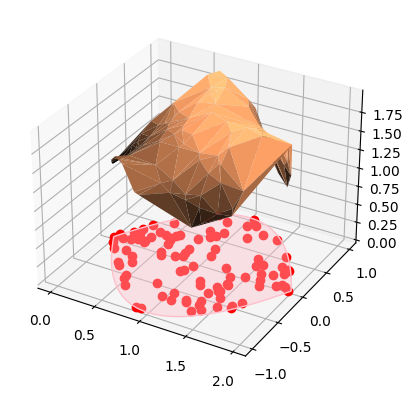

In [2]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Omega = {(x,y) : 0<=x<=2, |y|<= 2x-x^2}

dom = np.linspace(0,2,1000);
y1 = 2*dom-dom**2
y2 = -2*dom+dom**2

# Desenha o Omega
verts = [[x,y,0] for x,y in (list(zip(dom,y1)) + list(zip(dom,-y1))[::-1]) ]

ax.add_collection3d(Poly3DCollection([verts],color='pink',alpha=0.4)) # Add a polygon instead of fill_between

n = 100

P=[]
while len(P)<n:
    x = 2*np.random.rand()
    y = (2*np.random.rand()-1)*(2*x-x*x)
    P.append([x,y])
#f(x,y) = sin(sqrt(x^2 + y^2) + x^2*y) + 1
Z = np.array([np.sin(np.sqrt(x**2 + y**2) + x**2*y) + 1 for x,y in P])
P = np.array(P)
XYZ = np.concatenate( (P,Z.reshape(n,1)) ,axis=1)

tri = Delaunay(XYZ[:,:2])

ax.plot_trisurf(XYZ[:,0],XYZ[:,1],XYZ[:,2],triangles = tri.simplices , cmap = cm.copper)
ax.plot(XYZ[:,0],XYZ[:,1],np.zeros(n),'or')

plt.show()